# Objective is to check the Insurance Counts at different labels of categorical features in order to identify the affinity of diferent cuts towards the purchase of a policy

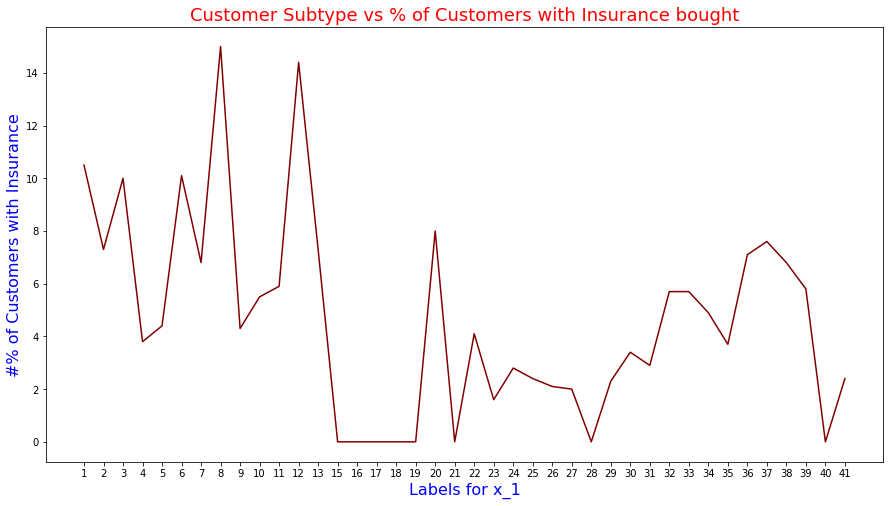

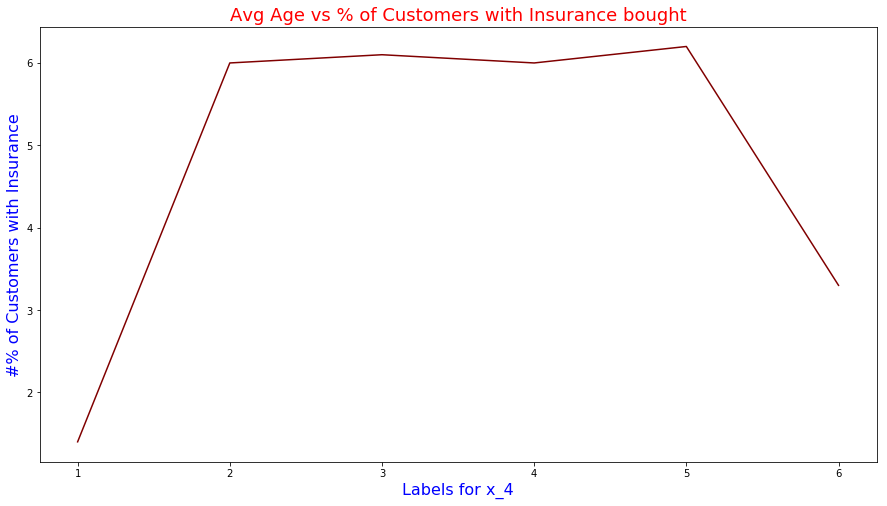

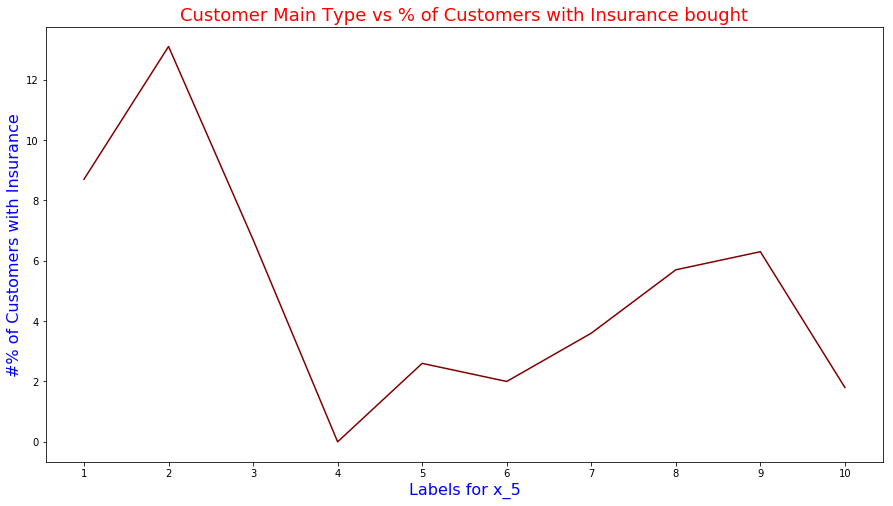

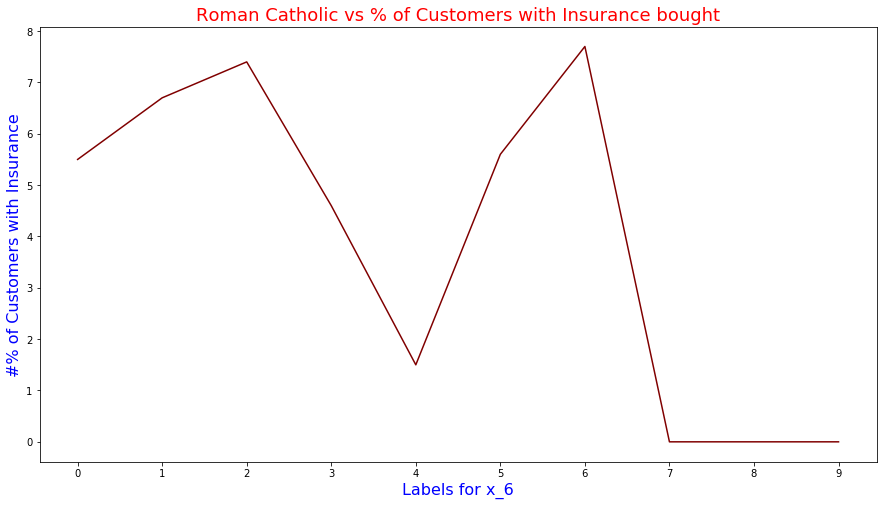

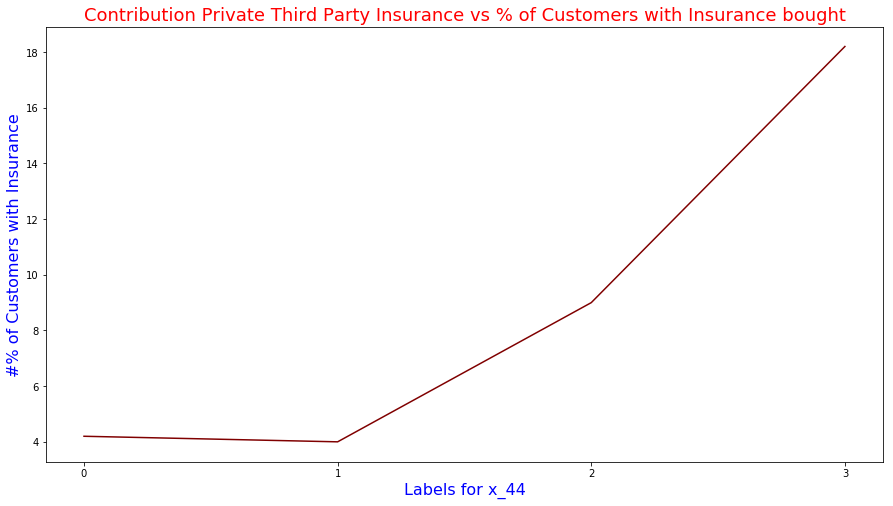

In [2]:
import pandas as pd
from matplotlib.pyplot import *
%matplotlib inline

data_ = pd.read_csv('ticdata2000.txt', sep='\t', header=None)
data_.columns = ['x_{}'.format(_) for _ in range(1, 86)]+['y']
data_ = data_[['x_1', 'x_4', 'x_5', 'x_6', 'x_44', 'y']]
data_.y = data_.y.astype('int')

# Store name for each cateforical feature
column_dict = dict(zip(['x_1', 'x_4', 'x_5', 'x_6', 'x_44'],
                       ['Customer Subtype', 'Avg Age', 'Customer Main Type', 'Roman Catholic',
                       'Contribution Private Third Party Insurance']))

# Plotting
for _ in ['x_1', 'x_4', 'x_5', 'x_6', 'x_44']:
    df_t = data_.groupby(by=_).size().reset_index(name='total_customers')
    df = data_.groupby(by=_).y.sum().reset_index(name='insurance_counts')
    df = df.merge(df_t, on=_, how='inner')
    df['perc_insurance'] = (round(df.insurance_counts/df.total_customers, 3))*100
    df.sort_values(by=_, ascending=True, inplace=True)
    df[_] = df[_].astype('str')
    figure(figsize=(15, 8))
    plot(df[_], df.perc_insurance, color='maroon')
    title('{} vs % of Customers with Insurance bought'.format(column_dict[_]), fontsize=18, color='r')
    xlabel('Labels for {}'.format(_), fontsize=16, color='blue')
    ylabel('#% of Customers with Insurance', fontsize=16, color='blue')
    savefig('{}.png'.format(_))